In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class CustomLinearRegression:
  def __init__(self, X_data,y_target, learning_rate=0.01, num_epochs=10000):
    self.num_samples = X_data.shape[0]
    self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
    self.y_target = y_target
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs

    self.theta = np.random.randn(self.X_data.shape[1], 1)
    self.losses = []


  def compute_loss(self, y_pred, y_target):
    loss = np.sum((y_pred - y_target) ** 2) / (2 * self.num_samples)
    return loss

  def predict(self, X_data):
    y_pred = X_data.dot(self.theta)
    return y_pred

  def fit(self):
    for epoch in range(self.num_epochs):
      if epoch % 50 == 0:
        print("Epoch: {epoch} - Loss: {loss}")
      y_pred = self.predict(self.X_data)
      loss = self.compute_loss(y_pred, self.y_target)
      self.losses.append(loss)

      loss_grd = 2 * (y_pred - self.y_target) / self.num_samples
      gradients = self.X_data.T.dot(loss_grd)

      self.theta = self.theta - self.learning_rate * gradients


    return {
        'loss': sum(self.losses) / len(self.losses),
        'weights': self.theta
    }


def r2score(y_pred, y):
  rss = np.sum((y_pred - y)**2)
  tss = np.sum((y - y.mean())**2)
  r2 = 1 - (rss / tss)
  return r2

In [5]:
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 5, 2, 4])
r2score(y_pred, y)

-2.235294117647059

In [8]:
def create_polynomial_features(X, degress=2):
  X_new = X
  for d in range(2, degress + 1):
    X_new = np.c_[X_new, np.power(X_new, d)]
  return X_new


X = np.array([[1], [2], [3]])
create_polynomial_features(X, degress=2)

array([[1, 1],
       [2, 4],
       [3, 9]])

In [25]:
X = np.array([[1, 2],
 [2, 3],
 [3, 4]])

def create_polynomial_features(X, degree = 2):
  X_mem = []
  for X_sub in X.T:
    X_new = X_sub
    for d in range(2, degree + 1):
      X_new = np.c_[X_new, np.power(X_sub, d)]
    X_mem.extend(X_new.T)
  return np.c_[X_mem].T

create_polynomial_features(X, degree = 2)

array([[ 1,  1,  2,  4],
       [ 2,  4,  3,  9],
       [ 3,  9,  4, 16]])

In [26]:
!gdown 1A8kK0IEsT3w8htzU18ihFr5UV-euhquC

Downloading...
From: https://drive.google.com/uc?id=1A8kK0IEsT3w8htzU18ihFr5UV-euhquC
To: /content/SalesPrediction.csv
100% 206k/206k [00:00<00:00, 102MB/s]


In [49]:
df = pd.read_csv('SalesPrediction.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [51]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [52]:
df = pd.get_dummies(df)
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


In [53]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TV                4572 non-null   float64
 1   Radio             4572 non-null   float64
 2   Social Media      4572 non-null   float64
 3   Sales             4572 non-null   float64
 4   Influencer_Macro  4572 non-null   bool   
 5   Influencer_Mega   4572 non-null   bool   
 6   Influencer_Micro  4572 non-null   bool   
 7   Influencer_Nano   4572 non-null   bool   
dtypes: bool(4), float64(4)
memory usage: 160.9 KB


In [54]:
from sklearn.model_selection import train_test_split

X = df.drop('Sales', axis=1).values
y = df[['Sales']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)
scaler.mean_[0]

54.195406538084875

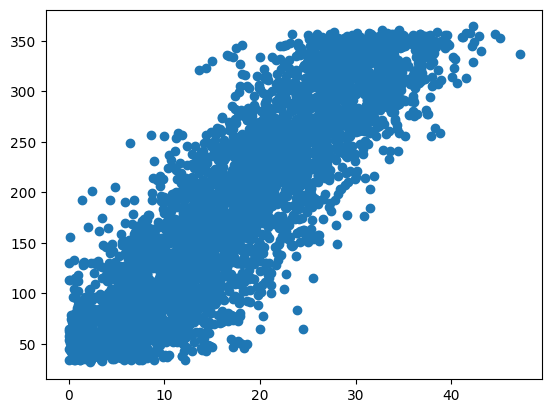

In [66]:
plt.scatter(X_train[:, 1], y_train)

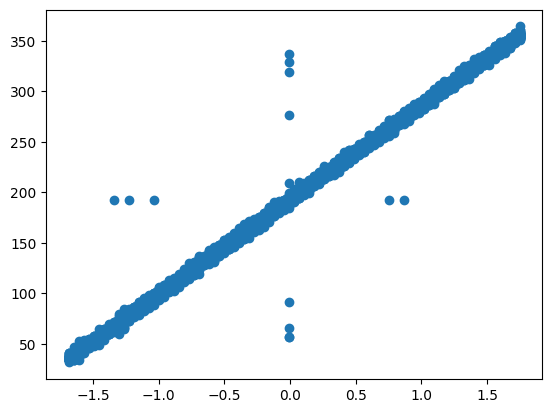

In [63]:
plt.scatter(X_train_processed[:, 0], y_train)

In [73]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2)
X_train_poly = poly_feat.fit_transform(X_train_processed)
X_test_poly = poly_feat.transform(X_test_processed)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train_poly, y_train)
preds = model.predict(X_test_poly)
r2_score(y_test, preds)

0.9921789428269724

In [72]:
model = LinearRegression()
model.fit(X_train_processed, y_train)
preds = model.predict(X_test_processed)
r2_score(y_test, preds)

0.9923943758279726